# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
import sys
from citipy import citipy
from pprint import pprint

#fetching the 
#url = "https://pypi.python.org/pypi/citipy"

# Import API key
from api_keys import api_key

url = f"http://api.openweathermap.org/data/2.5/weather?q=London,uk&apikey={api_key}"

units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# testing
print(requests.get(url))

<Response [200]>


In [3]:
#viewing the json for the weather for one city, London
pprint(requests.get(url).json())

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1562364484,
 'id': 2643743,
 'main': {'humidity': 82,
          'pressure': 1016,
          'temp': 292.2,
          'temp_max': 295.37,
          'temp_min': 288.71},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1412,
         'message': 0.0124,
         'sunrise': 1562298613,
         'sunset': 1562357969,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'speed': 3.1}}


In [ ]:
######################################################################################################################

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [5]:
#view list of random cities
cities

['butaritari',
 'jamestown',
 'guerrero negro',
 'busselton',
 'mobaye',
 'ilulissat',
 'adrar',
 'sitka',
 'constantine',
 'pirapemas',
 'puerto ayora',
 'cabo san lucas',
 'sungaipenuh',
 'lolua',
 'ancud',
 'tabiauea',
 'sile',
 'hithadhoo',
 'la crosse',
 'san rafael',
 'belushya guba',
 'qaanaaq',
 'jedrzejow',
 'nampula',
 'harper',
 'katsuura',
 'vao',
 'bato',
 'nizhneyansk',
 'yellowknife',
 'hvide sande',
 'gashua',
 'belmonte',
 'korla',
 'mlowo',
 'tupik',
 'san patricio',
 'vaini',
 'lompoc',
 'thompson',
 'kudahuvadhoo',
 'grudziadz',
 'luderitz',
 'pevek',
 'aras',
 'new norfolk',
 'sao filipe',
 'benguela',
 'salalah',
 'plettenberg bay',
 'sola',
 'upernavik',
 'albany',
 'port elizabeth',
 'mataura',
 'atuona',
 'tutin',
 'bredasdorp',
 'coquimbo',
 'kodiak',
 'perigueux',
 'hermanus',
 'san angelo',
 'laguna',
 'faanui',
 'barentsburg',
 'cape town',
 'bluff',
 'smidovich',
 'kahului',
 'port alfred',
 'narsingi',
 'dicabisagan',
 'shasta lake',
 'tuktoyaktuk',
 'sid

In [6]:
print(lat_lngs)

In [ ]:
######################################################################################################################

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
######################################################################################################################

In [7]:
#Identify the end point for getting the weather data of each city
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


In [8]:
# Create lists for all the information that is being fetched
random_cities = []
cloudiness = []
countries = []
dates = []
humidities = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []


In [9]:
#Get the weather data for each city in the random cities list
count = 1
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        random_cities.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt']) 
        humidities.append(response['main']['humidity'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])

        print(f"getting weather data for {city}, {count} of {len(cities)}")
    except:
        print(f"weather data for ({city}) not found; getting weather for next city")
        
    count = count + 1

getting weather data for butaritari, 1 of 632
getting weather data for jamestown, 2 of 632
getting weather data for guerrero negro, 3 of 632
getting weather data for busselton, 4 of 632
getting weather data for mobaye, 5 of 632
getting weather data for ilulissat, 6 of 632
getting weather data for adrar, 7 of 632
getting weather data for sitka, 8 of 632
getting weather data for constantine, 9 of 632
getting weather data for pirapemas, 10 of 632
getting weather data for puerto ayora, 11 of 632
getting weather data for cabo san lucas, 12 of 632
getting weather data for sungaipenuh, 13 of 632
weather data for (lolua) not found; getting weather for next city
getting weather data for ancud, 15 of 632
weather data for (tabiauea) not found; getting weather for next city
getting weather data for sile, 17 of 632
getting weather data for hithadhoo, 18 of 632
getting weather data for la crosse, 19 of 632
getting weather data for san rafael, 20 of 632
weather data for (belushya guba) not found; get

getting weather data for imperial beach, 172 of 632
getting weather data for mattru, 173 of 632
getting weather data for yar-sale, 174 of 632
getting weather data for tigil, 175 of 632
weather data for (tahta) not found; getting weather for next city
getting weather data for port moresby, 177 of 632
getting weather data for amga, 178 of 632
getting weather data for dudinka, 179 of 632
getting weather data for atar, 180 of 632
getting weather data for chokurdakh, 181 of 632
getting weather data for provideniya, 182 of 632
getting weather data for warrnambool, 183 of 632
weather data for (grand river south east) not found; getting weather for next city
getting weather data for kilifi, 185 of 632
getting weather data for seoul, 186 of 632
getting weather data for newport, 187 of 632
getting weather data for tiksi, 188 of 632
getting weather data for bethel, 189 of 632
getting weather data for itacare, 190 of 632
getting weather data for kalmunai, 191 of 632
getting weather data for severo

weather data for (sataua) not found; getting weather for next city
getting weather data for novki, 343 of 632
getting weather data for mudbidri, 344 of 632
getting weather data for saint george, 345 of 632
getting weather data for padang, 346 of 632
getting weather data for assiniboia, 347 of 632
weather data for (palabuhanratu) not found; getting weather for next city
getting weather data for beisfjord, 349 of 632
weather data for (karkaralinsk) not found; getting weather for next city
getting weather data for salisbury, 351 of 632
getting weather data for san luis de palenque, 352 of 632
getting weather data for zhanaozen, 353 of 632
getting weather data for antofagasta, 354 of 632
getting weather data for sambava, 355 of 632
getting weather data for nueve de julio, 356 of 632
weather data for (saleaula) not found; getting weather for next city
getting weather data for komsomolskiy, 358 of 632
getting weather data for kostomuksha, 359 of 632
getting weather data for lodwar, 360 of 63

getting weather data for rolleston, 510 of 632
getting weather data for ekhabi, 511 of 632
weather data for (pemangkat) not found; getting weather for next city
getting weather data for rocha, 513 of 632
getting weather data for ambilobe, 514 of 632
weather data for (acarau) not found; getting weather for next city
getting weather data for jiuquan, 516 of 632
getting weather data for ust-nera, 517 of 632
getting weather data for grenada, 518 of 632
getting weather data for verkhnevilyuysk, 519 of 632
getting weather data for killybegs, 520 of 632
getting weather data for sringeri, 521 of 632
getting weather data for richards bay, 522 of 632
getting weather data for kupang, 523 of 632
getting weather data for vardo, 524 of 632
getting weather data for caravelas, 525 of 632
getting weather data for qinhuangdao, 526 of 632
getting weather data for filingue, 527 of 632
getting weather data for gravdal, 528 of 632
getting weather data for pangody, 529 of 632
getting weather data for pontes 

In [3]:
#####################################################################################################################

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#create dictionary of lists of cities and respective weather data:
weather_dictionary = {
                'City': random_cities,
                'Cloudiness': cloudiness,
                'Country': countries,
                'Date': dates,
                'Humidity': humidities,
                'Latitude': latitudes,
                'Longitude': longitudes,
                'Max Temp F': max_temps,
                'Wind Speed': wind_speeds
}

In [11]:
weather_dictionary

{'City': ['Butaritari',
  'Jamestown',
  'Guerrero Negro',
  'Busselton',
  'Mobaye',
  'Ilulissat',
  'Adrar',
  'Sitka',
  'Constantine',
  'Pirapemas',
  'Puerto Ayora',
  'Cabo San Lucas',
  'Sungaipenuh',
  'Ancud',
  'Sile',
  'Hithadhoo',
  'La Crosse',
  'San Rafael',
  'Qaanaaq',
  'Jedrzejow',
  'Nampula',
  'Harper',
  'Katsuura',
  'Vao',
  'Bato',
  'Yellowknife',
  'Hvide Sande',
  'Gashua',
  'Belmonte',
  'Mlowo',
  'Tupik',
  'San Patricio',
  'Vaini',
  'Lompoc',
  'Thompson',
  'Kudahuvadhoo',
  'Grudziadz',
  'Luderitz',
  'Pevek',
  'Aras',
  'New Norfolk',
  'Sao Filipe',
  'Benguela',
  'Salalah',
  'Plettenberg Bay',
  'Sola',
  'Upernavik',
  'Albany',
  'Port Elizabeth',
  'Mataura',
  'Atuona',
  'Tutin',
  'Bredasdorp',
  'Coquimbo',
  'Kodiak',
  'Perigueux',
  'Hermanus',
  'San Angelo',
  'Laguna',
  'Faanui',
  'Cape Town',
  'Bluff',
  'Smidovich',
  'Kahului',
  'Port Alfred',
  'Narsingi',
  'Dicabisagan',
  'Shasta Lake',
  'Tuktoyaktuk',
  'Ribeira 

In [12]:
#convert the weather dictionary into a data frame
weather_dataframe = pd.DataFrame(weather_dictionary)

In [13]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp F,Wind Speed
0,Butaritari,0,KI,1562364636,71,3.07,172.79,83.93,6.44
1,Jamestown,19,AU,1562364460,69,-33.21,138.60,55.31,14.41
2,Guerrero Negro,0,MX,1562364636,87,27.97,-114.04,64.67,14.29
3,Busselton,100,AU,1562364636,84,-33.64,115.35,45.00,18.86
4,Mobaye,100,CF,1562364636,94,4.33,21.18,71.87,0.67


In [14]:
weather_dataframe.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Latitude      562
Longitude     562
Max Temp F    562
Wind Speed    562
dtype: int64

In [17]:
#Export the Weather_df to a csv file
weather_dataframe.to_csv("weather.csv", header = True, index = False)

In [4]:
######################################################################################################################

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


In [ ]:
######################################################################################################################

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

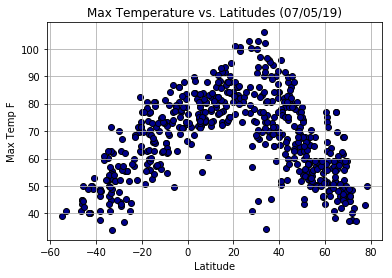

<Figure size 432x288 with 0 Axes>

In [27]:
#Plotting Maximum temperature vs. Latitude
plt.scatter(weather_dataframe['Latitude'], weather_dataframe['Max Temp F'], marker = 'o', color = 'darkblue', edgecolor = 'black')
plt.title(f"Max Temperature vs. Latitudes ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Max Temp F')
plt.xlabel('Latitude')
plt.grid()
plt.show()
#save the scatter plot as an image file
plt.savefig('MaxTempvsLatitude.png')

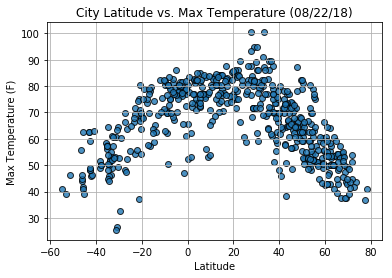

In [6]:
######################################################################################################################

#### Latitude vs. Humidity Plot

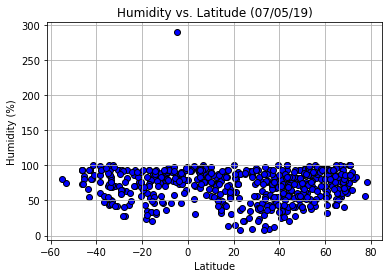

<Figure size 432x288 with 0 Axes>

In [24]:
#Plotting Humidity vs. Latitude
plt.scatter(weather_dataframe['Latitude'], weather_dataframe['Humidity'], marker = 'o', color = 'blue', edgecolor = 'black')
plt.title(f"Humidity vs. Latitude ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.show()
#save the scatter plot as an image file
plt.savefig('HumidityvsLatitude.png')

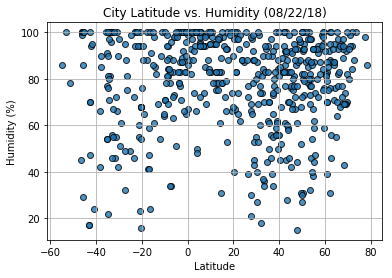

In [7]:
######################################################################################################################

#### Latitude vs. Cloudiness Plot

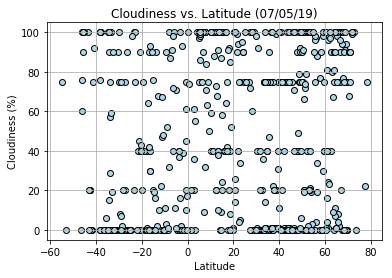

<Figure size 432x288 with 0 Axes>

In [26]:
#Plotting Humidity vs. Latitude
plt.scatter(weather_dataframe['Latitude'], weather_dataframe['Cloudiness'], marker = 'o', color = 'lightblue', edgecolor = 'black')
plt.title(f"Cloudiness vs. Latitude ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.show()
#save the scatter plot as an image file
plt.savefig('Latitude_vs_Cloudiness.png')

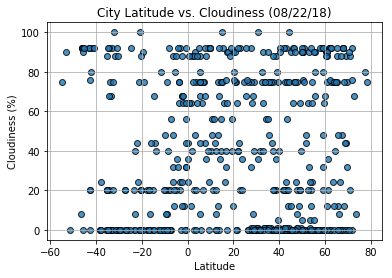

In [8]:
######################################################################################################################

#### Latitude vs. Wind Speed Plot

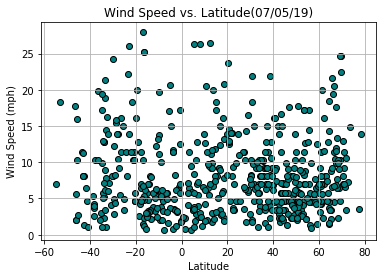

<Figure size 432x288 with 0 Axes>

In [28]:
#Plotting Humidity vs. Latitude
plt.scatter(weather_dataframe['Latitude'], weather_dataframe['Wind Speed'], marker = 'o', color = 'teal', edgecolor = 'black')
plt.title(f"Wind Speed vs. Latitude ({time.strftime('%m') + '/' + time.strftime('%d') + '/' + time.strftime('%y')})")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.show()
#save the scatter plot as an image file
plt.savefig('WindSpeedvsLatitude.png')

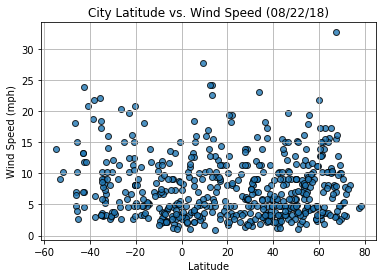

In [9]:
######################################################################################################################